 Develop a customer segmentation to strategize marketing campaigns.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# I using Google Colab
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CC GENERAL.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.shape


(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()
#see have any null values in the data frame

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Missing values by mean value of the columns

df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
#exploratory  data analysis

EDA_df = df.copy()
EDA_df.drop(columns=['CUST_ID'] , axis=1 , inplace=True)

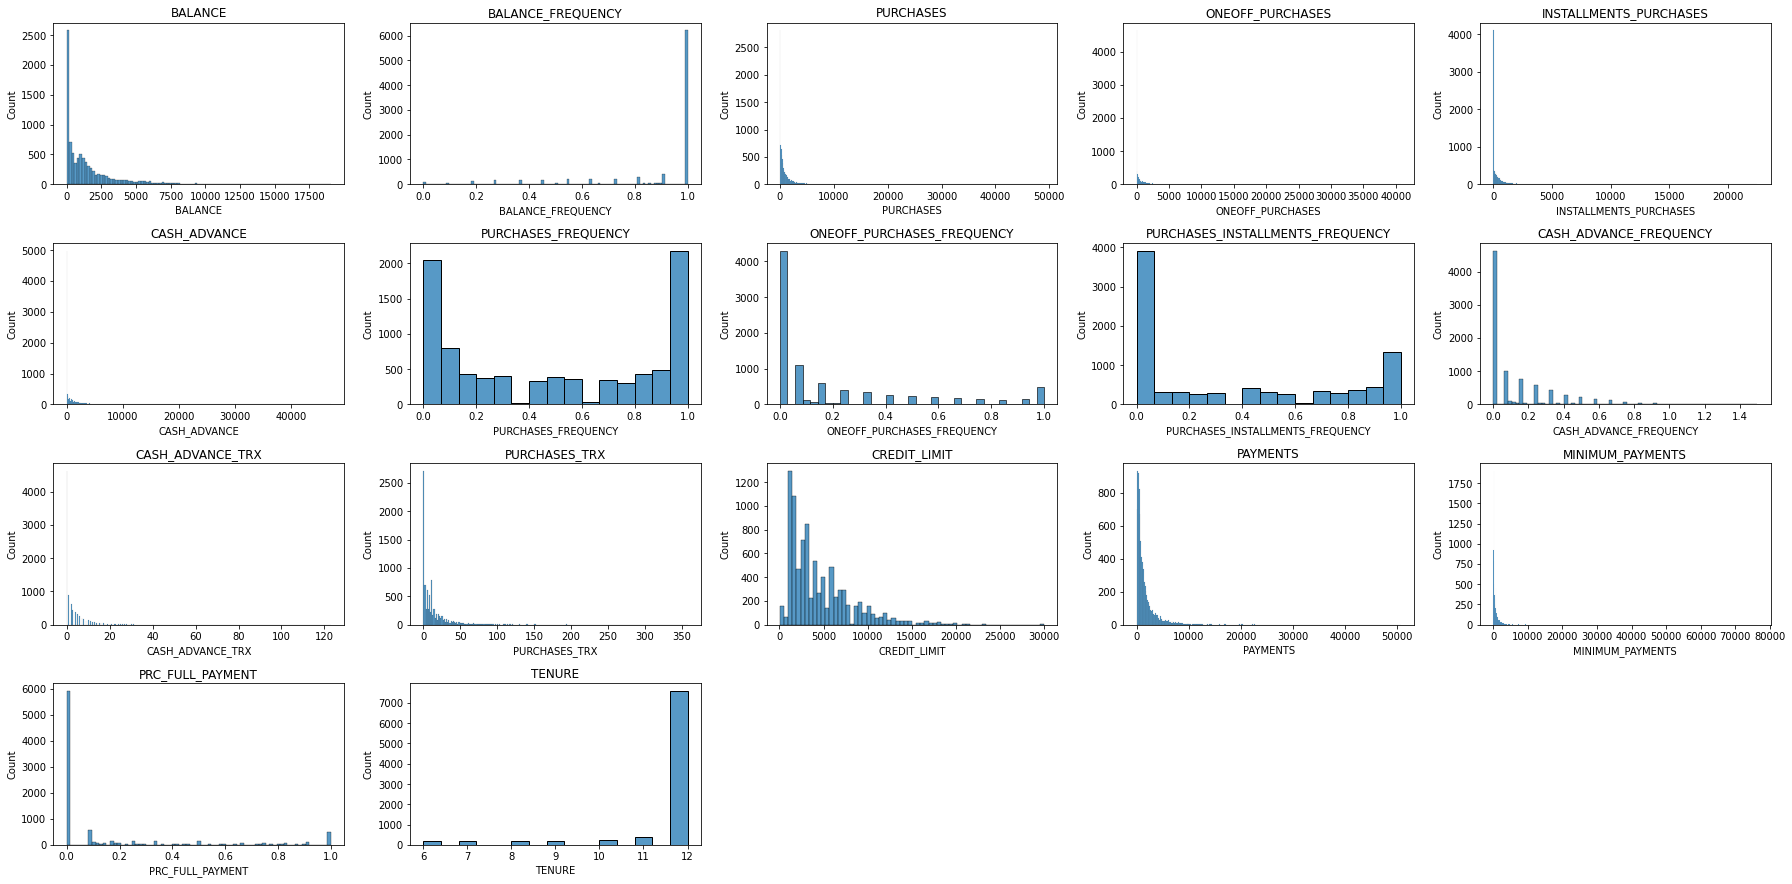

In [ ]:
plt.figure(figsize=(25,15))

for i, column in enumerate(EDA_df.columns):
    plt.subplot(5,5,i + 1)
    sns.histplot(data=EDA_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#plot out all the data into histogram

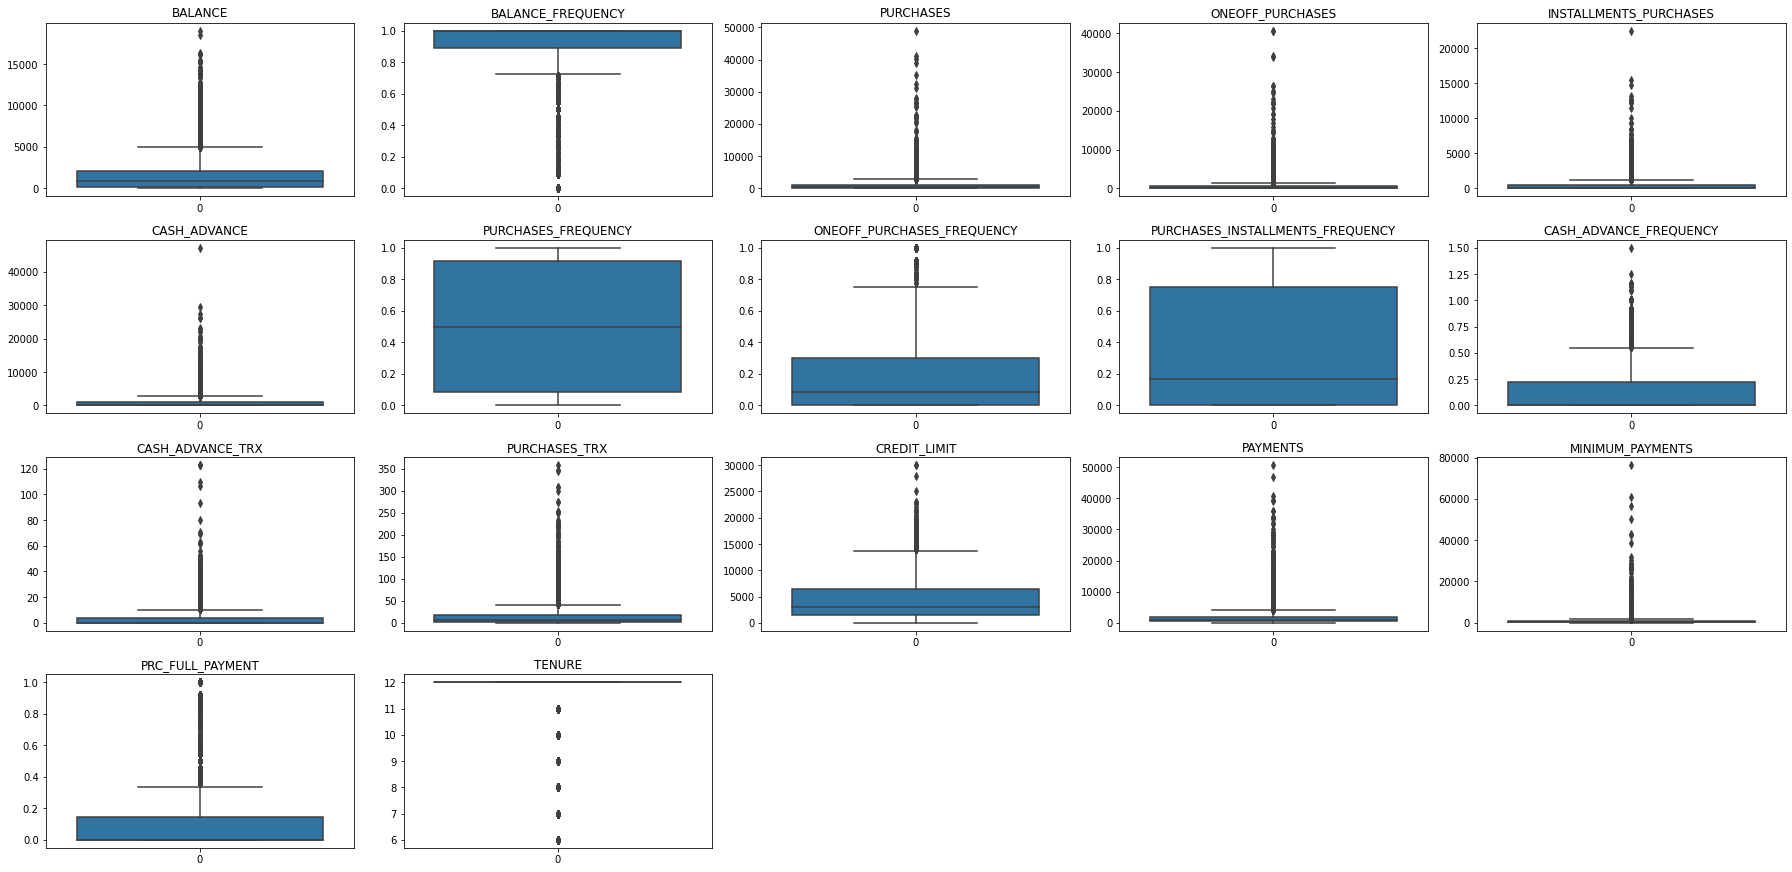

In [ ]:
plt.figure(figsize=(25,15))

for i, column in enumerate(EDA_df.columns):
    plt.subplot(5,5,i + 1)
    sns.boxplot(data=EDA_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#plot all the data into boxplot

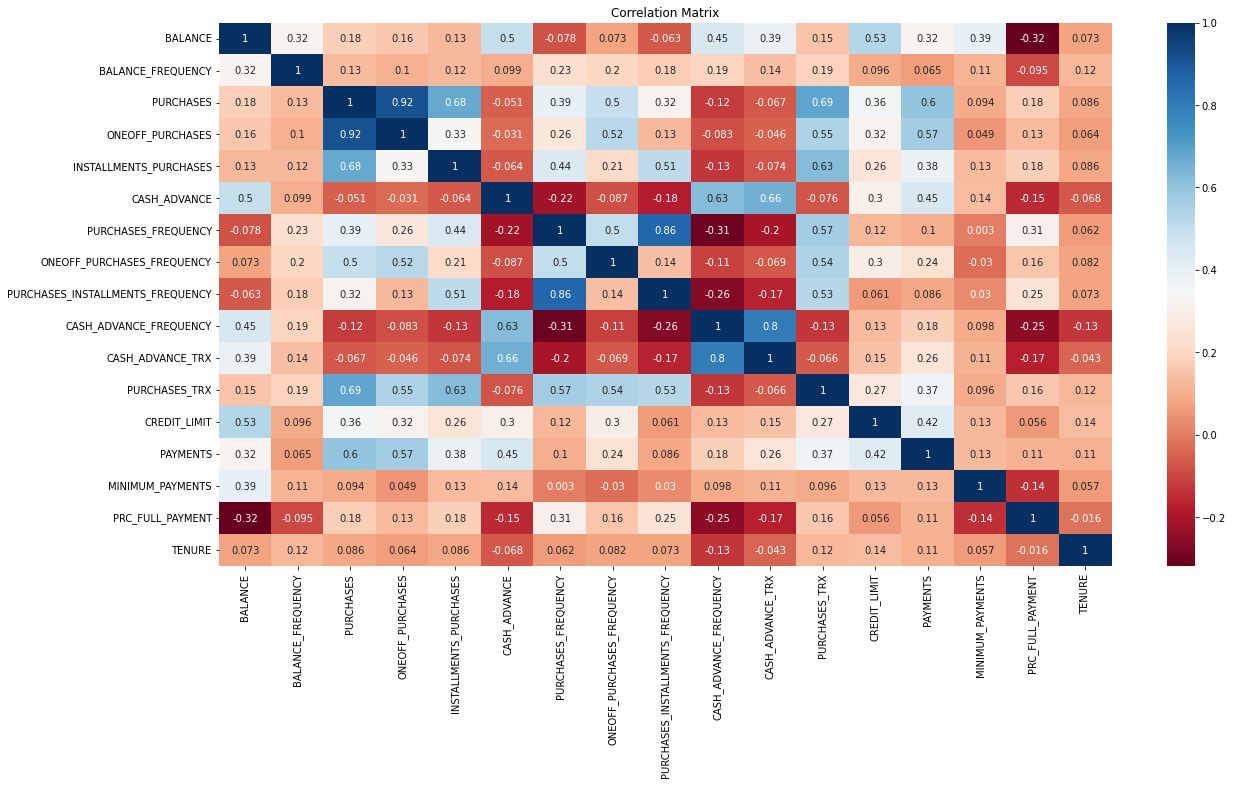

In [ ]:
corr = EDA_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask=None,cmap='RdBu')
plt.title("Correlation Matrix")
plt.show()

#plotting out the correlation matrix

In [ ]:
from sklearn.preprocessing import normalize ,StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(EDA_df)

In [ ]:
data_scaled.shape

(8950, 17)

In [ ]:
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

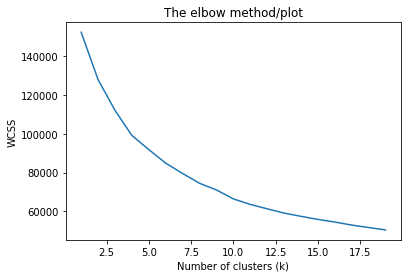

In [ ]:
# Import our kmeans algorithm
from sklearn.cluster import KMeans

# WCSS - Plot the elbow plot    
# WCSS is the sum of squares of the distances of each data point in all 
# clusters to their respective centroids. The idea is to minimise the sum.
wcss = []



for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_scaled) # train the algorithm with the input data (x)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia
    
# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,20), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(data_scaled)
labels=kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[EDA_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.013045,0.371234,-0.356663,-0.238652,-0.404777,-0.079544,-0.860526,-0.388559,-0.768249,0.140509,-0.022572,-0.485634,-0.339141,-0.265721,-0.028288,-0.452986,-0.008641
1,-0.390955,0.308338,-0.064164,-0.258151,0.322506,-0.360116,0.979310,-0.414439,1.172416,-0.460090,-0.355956,0.134218,-0.326110,-0.242245,-0.049131,0.350854,-0.026346
2,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
3,1.599354,0.375882,-0.223579,-0.157572,-0.239235,1.941877,-0.478099,-0.203961,-0.427942,1.895719,1.840301,-0.275164,0.967511,0.742408,0.508583,-0.393290,-0.091104
4,1.061664,0.464922,2.568116,1.856654,2.661343,-0.132019,1.161385,1.545191,1.264447,-0.272518,-0.135158,3.169122,1.332586,1.506896,0.582084,0.274279,0.336504
5,-0.698223,-2.131153,-0.316838,-0.234934,-0.317441,-0.306694,-0.565454,-0.431602,-0.462761,-0.484578,-0.358390,-0.428116,-0.210944,-0.221872,-0.255604,0.255939,-0.161814
6,-0.113635,0.397736,0.545153,0.656218,0.083203,-0.328250,0.986274,1.853346,0.233950,-0.410287,-0.334163,0.648252,0.443878,0.142255,-0.154569,0.413083,0.215331


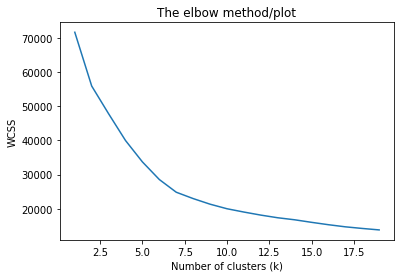

In [ ]:
wcss = []



for i in range(1,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_scaled[:,:8]) # train the algorithm with the input data (x)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia
    
# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,20), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

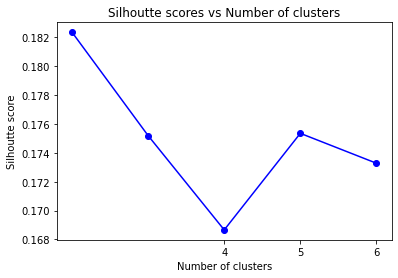

In [ ]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(data_scaled, model.labels_) for model in kmeans_models[2:7]]
plt.plot(range(2,7), silhoutte_scores, "bo-")
plt.xticks([ 4,5, 6])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [ ]:
kmeans = KMeans(7)
kmeans.fit(data_scaled)

labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
# this is the centre point of all the 7 cluster
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[EDA_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
1,-0.370482,0.331736,-0.042552,-0.232834,0.326972,-0.369052,0.973291,-0.351260,1.162614,-0.478251,-0.363361,0.167117,-0.277556,-0.224907,-0.030827,0.300786,0.252688
2,-0.701957,-2.130637,-0.307115,-0.230400,-0.302768,-0.323440,-0.547199,-0.427080,-0.442123,-0.522635,-0.377066,-0.416671,-0.172727,-0.202544,-0.257756,0.293203,0.199928
3,1.680042,0.395285,-0.199012,-0.146595,-0.201330,2.002738,-0.447132,-0.182778,-0.396221,1.915249,1.932749,-0.232305,1.018222,0.844153,0.557746,-0.391050,0.068538
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,0.012160,0.402577,-0.345358,-0.226154,-0.401000,-0.098243,-0.817611,-0.339406,-0.758164,0.094058,-0.034185,-0.467038,-0.300283,-0.246182,-0.013870,-0.452455,0.272256
6,0.134254,0.430241,0.947576,0.899835,0.587357,-0.306838,1.094331,1.867370,0.539793,-0.409054,-0.318466,1.208674,0.707372,0.395692,-0.033780,0.457602,0.307767


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [EDA_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
1,793.348420,0.955856,912.292347,205.981048,706.744510,204.950963,0.880979,0.097670,0.826490,0.039441,0.769156,18.863725,3484.587877,1082.059727,792.364589,0.241689,11.855480
2,103.411419,0.372542,347.049202,210.020008,137.278605,300.601383,0.270733,0.075051,0.188727,0.030560,0.675630,4.352941,3865.999533,1146.799095,263.516645,0.239471,11.784874
3,5061.340456,0.970910,578.012881,349.120418,229.007345,5178.706437,0.310895,0.147932,0.206969,0.518405,16.438418,8.935593,8199.157678,4176.884887,2164.010675,0.039339,11.609040
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
5,1589.785302,0.972637,265.341501,217.068365,48.447944,772.850503,0.162204,0.101206,0.063124,0.153966,3.015542,3.101024,3401.895679,1020.471801,831.883431,0.021379,11.881667
6,1843.912500,0.979191,3027.714540,2085.979449,942.207160,335.418063,0.929559,0.759531,0.578965,0.053288,1.075531,44.752950,7068.156784,2878.632693,785.483335,0.287555,11.929190


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()

6

In [ ]:
labels.min()

0

In [ ]:
y= kmeans.fit_predict(data_scaled)
y

array([4, 1, 3, ..., 6, 6, 6], dtype=int32)

In [ ]:
EDA_df_cluster =pd.concat([EDA_df,pd.DataFrame({'cluster':labels})],axis=1)
EDA_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


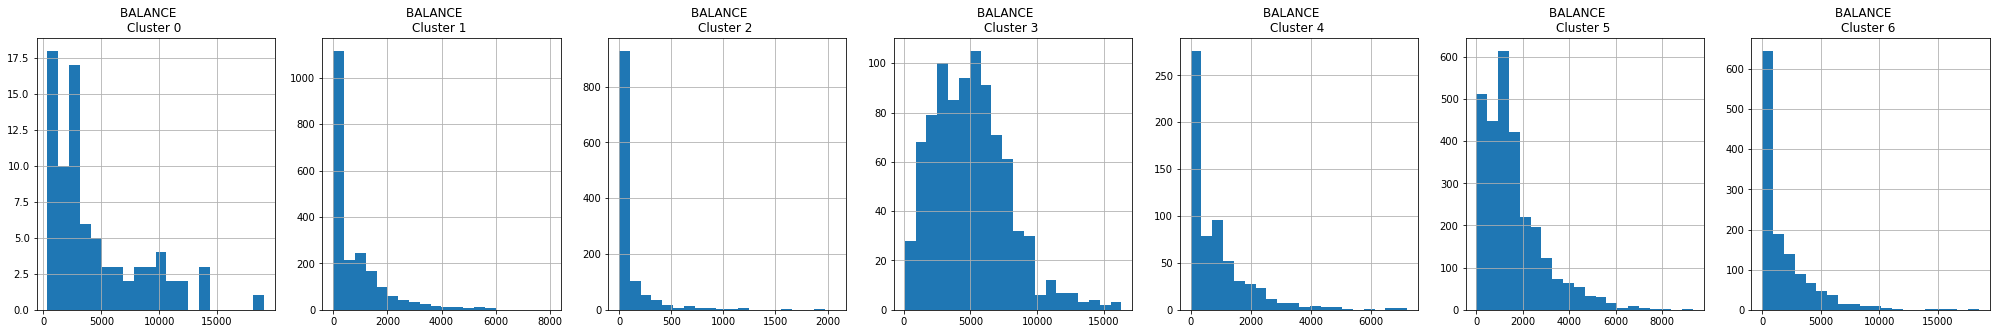

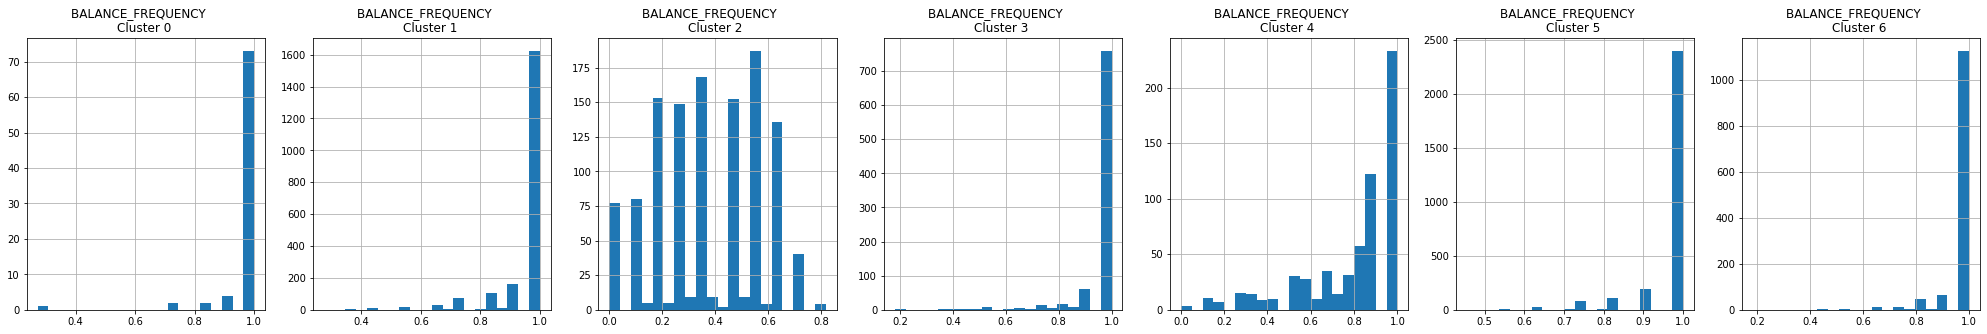

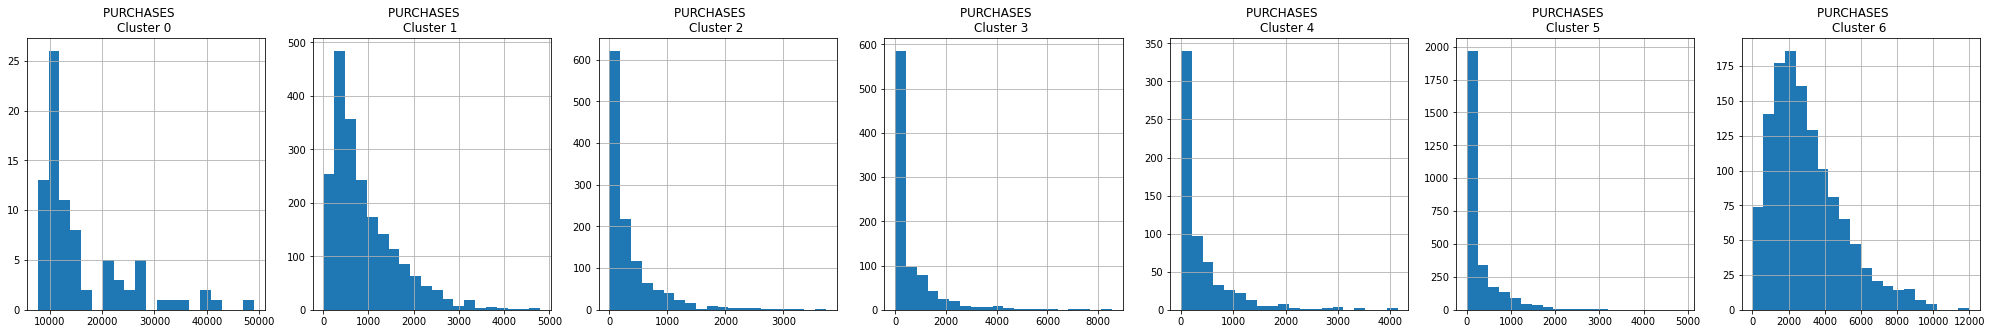

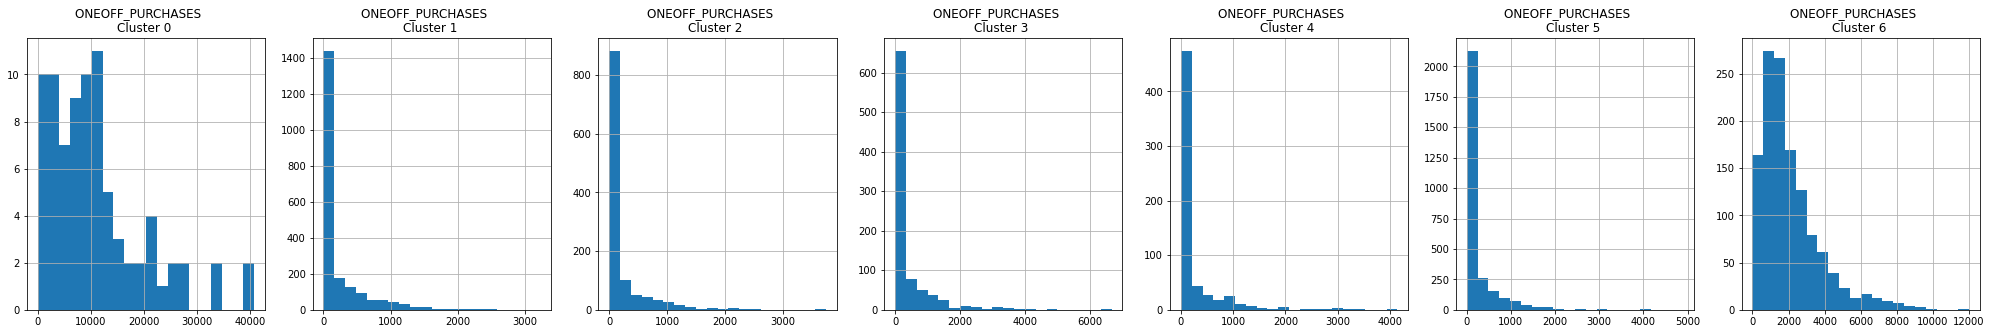

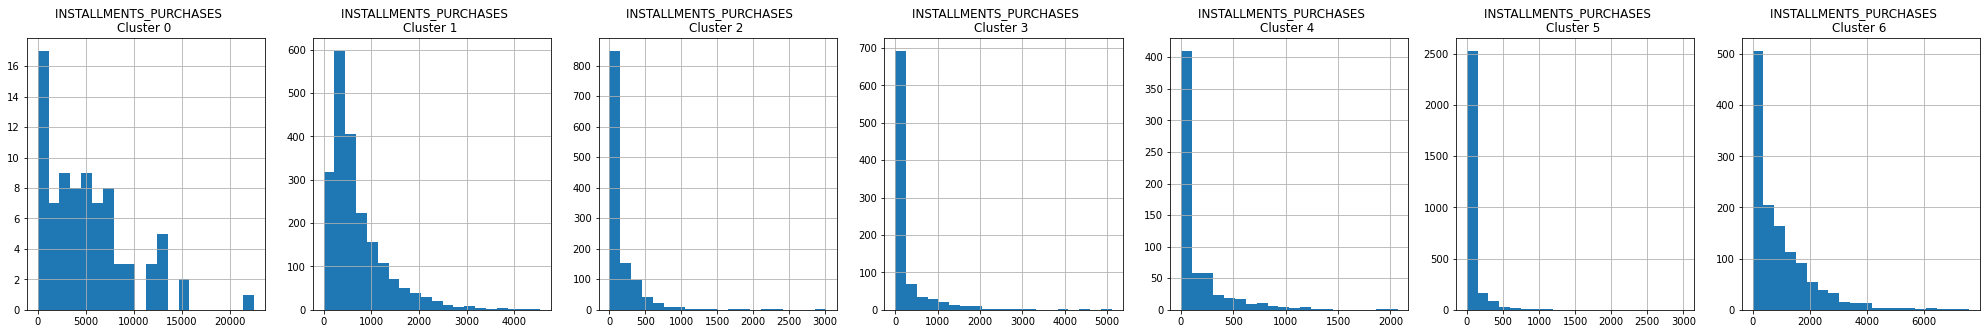

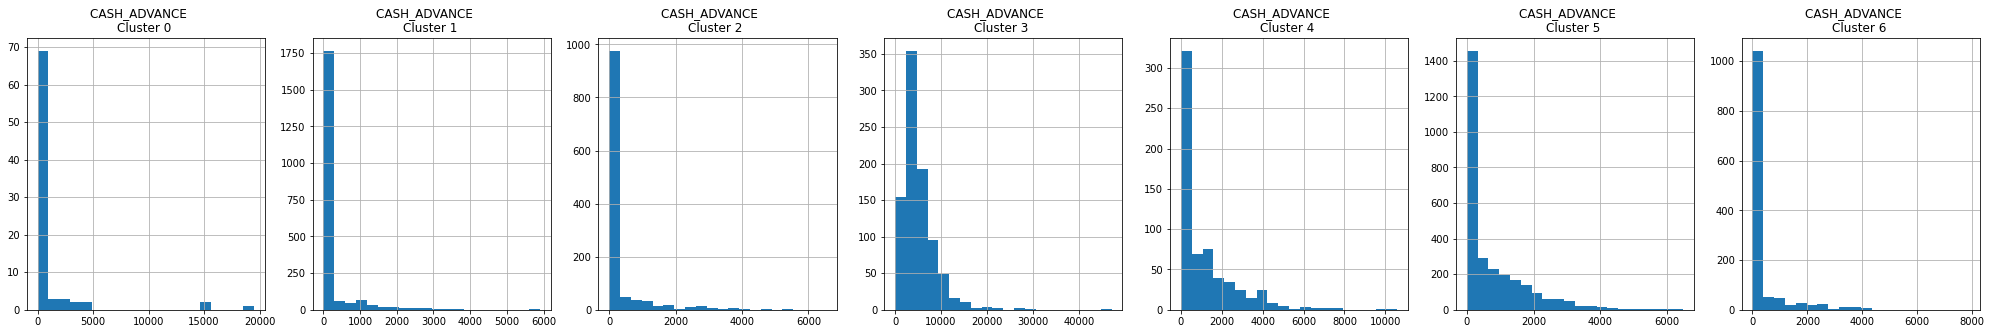

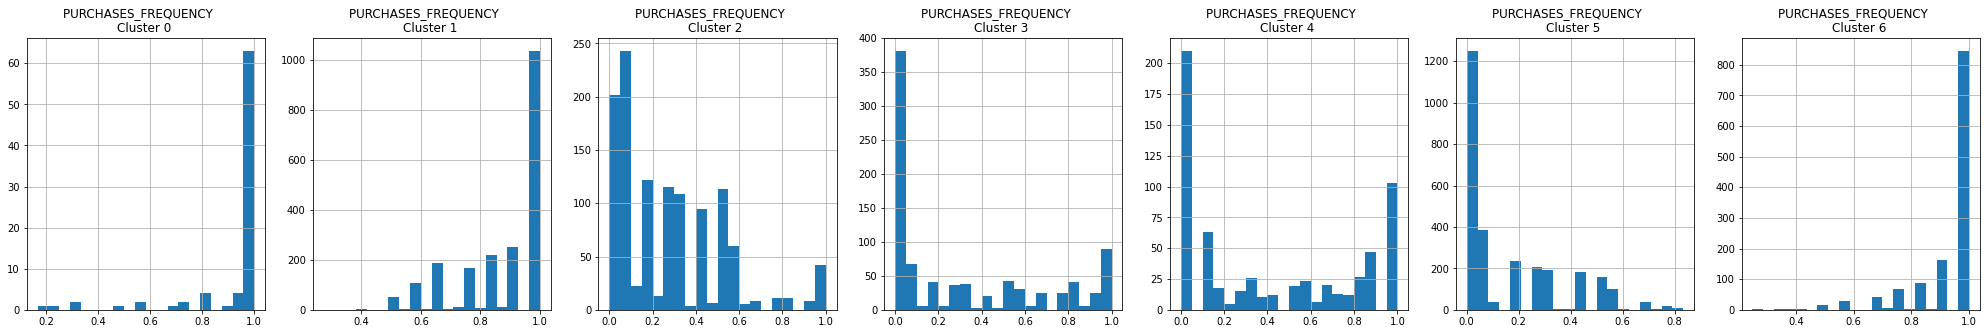

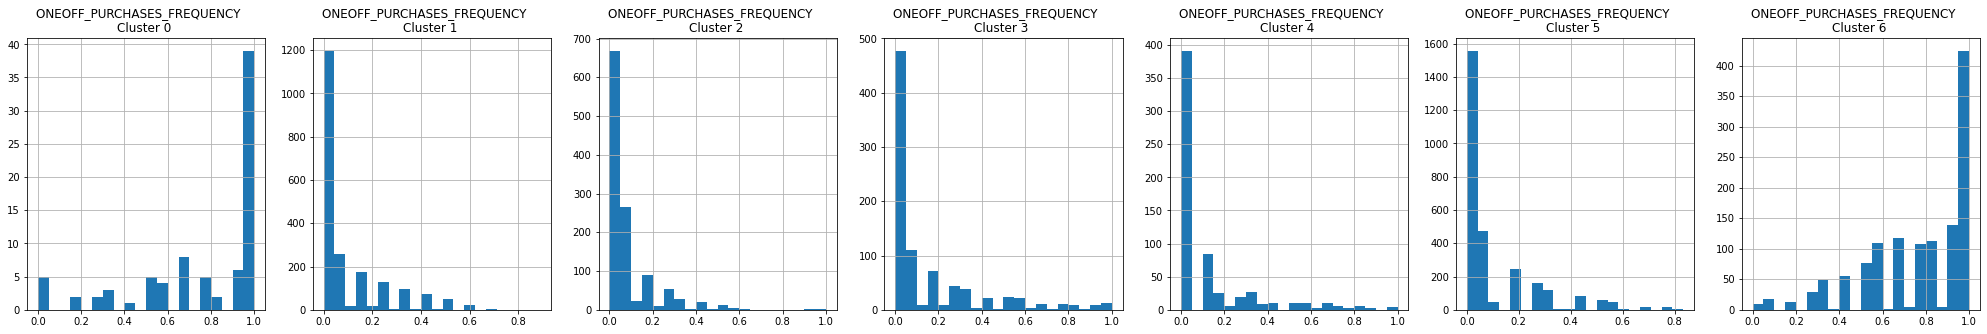

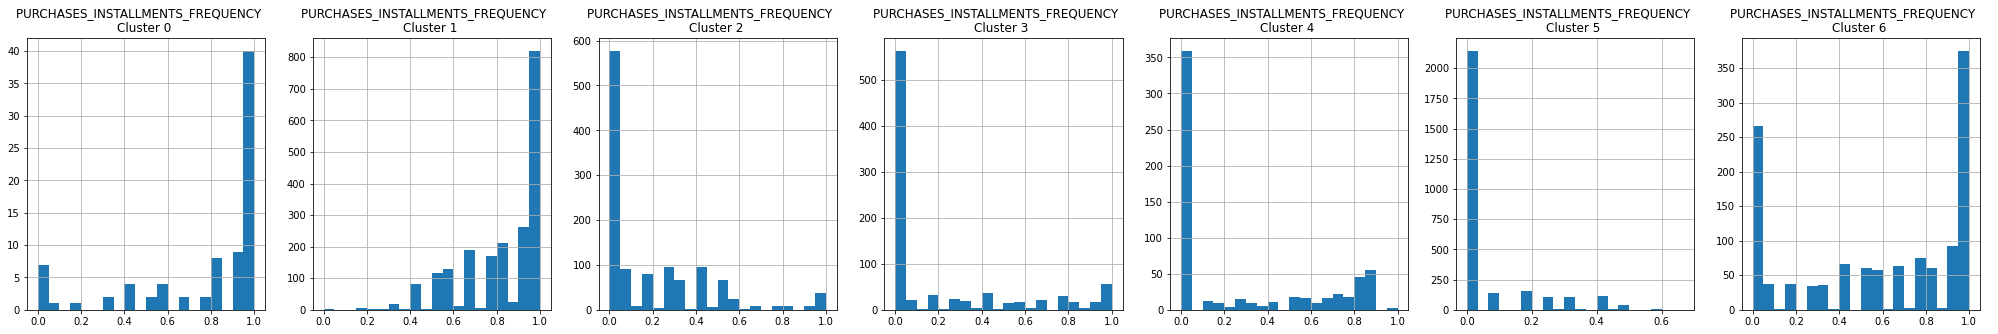

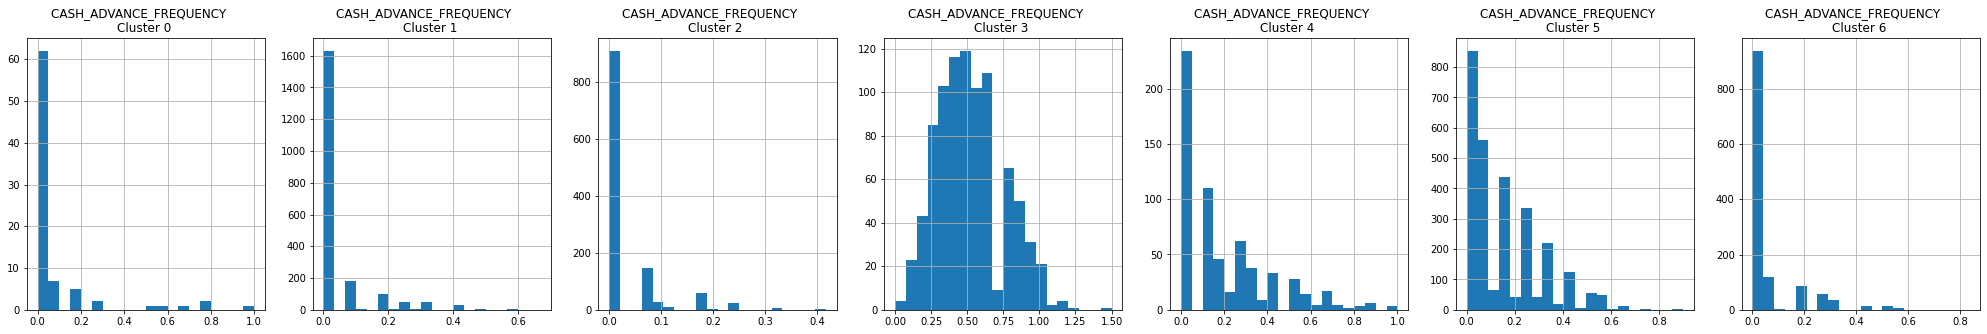

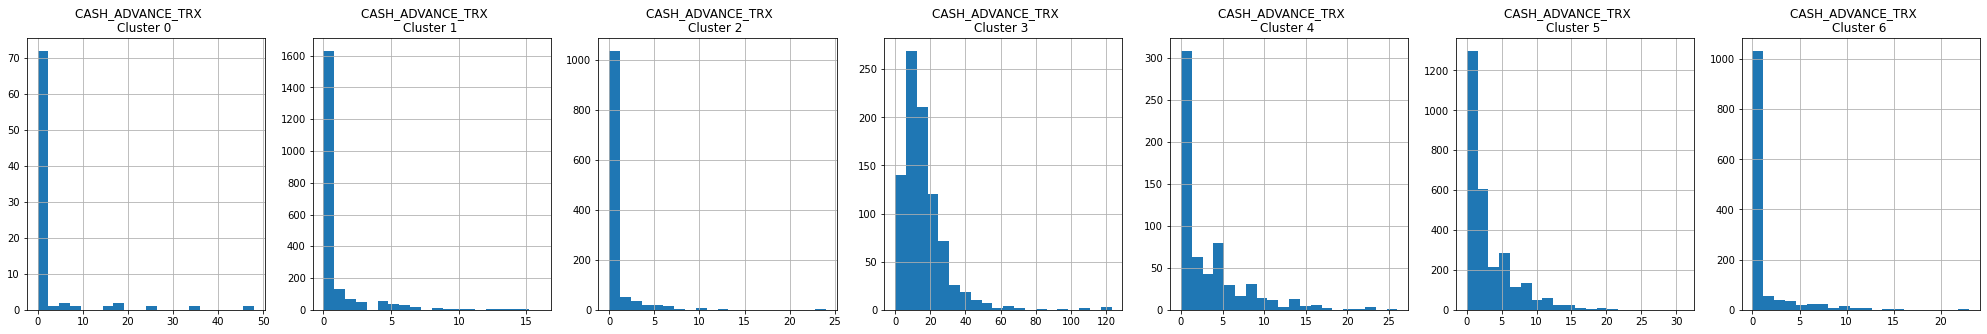

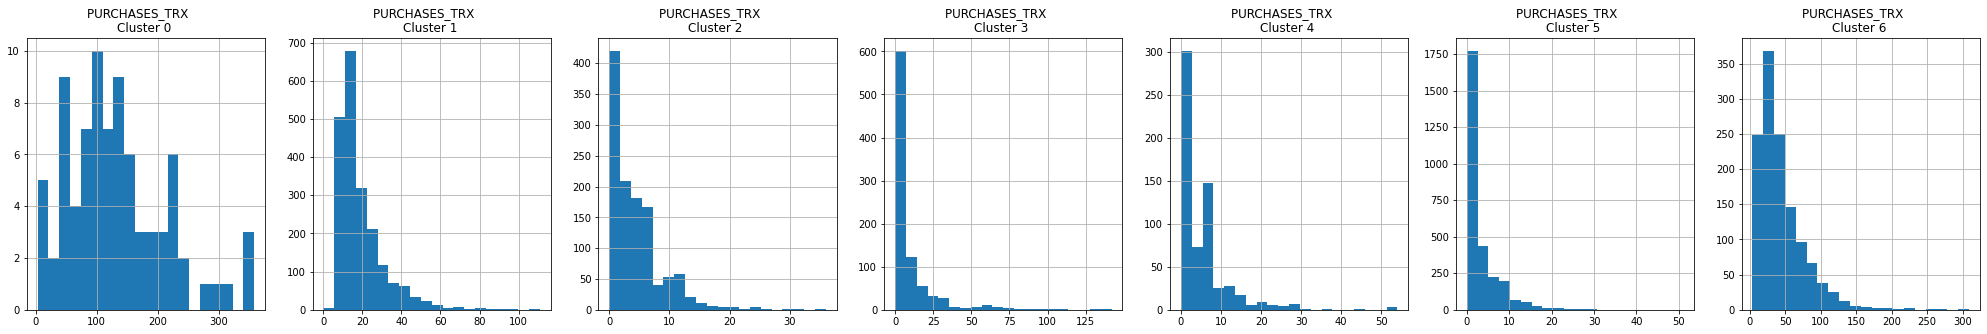

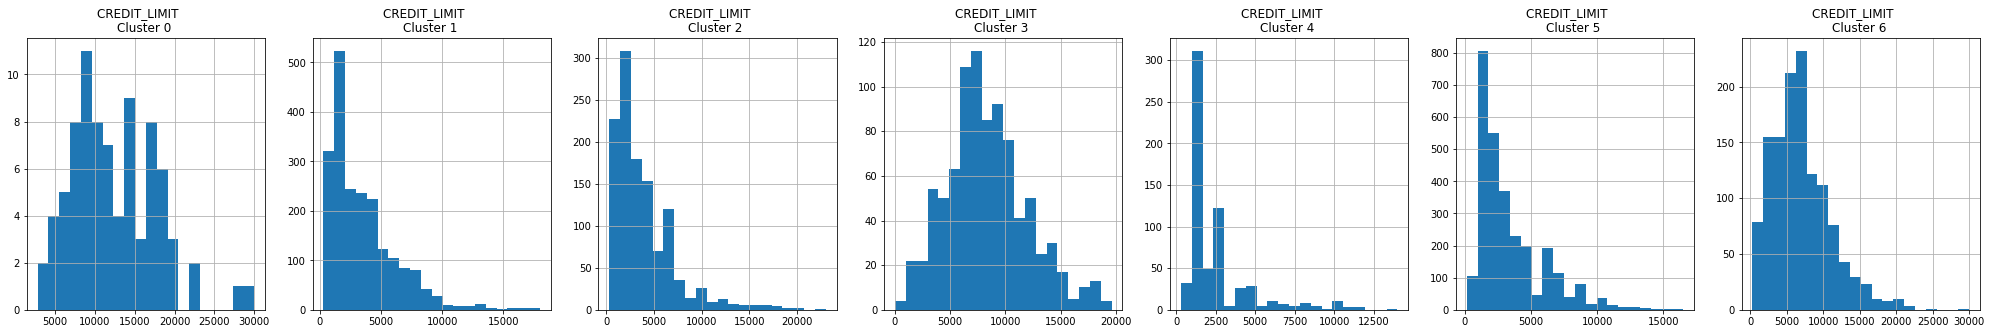

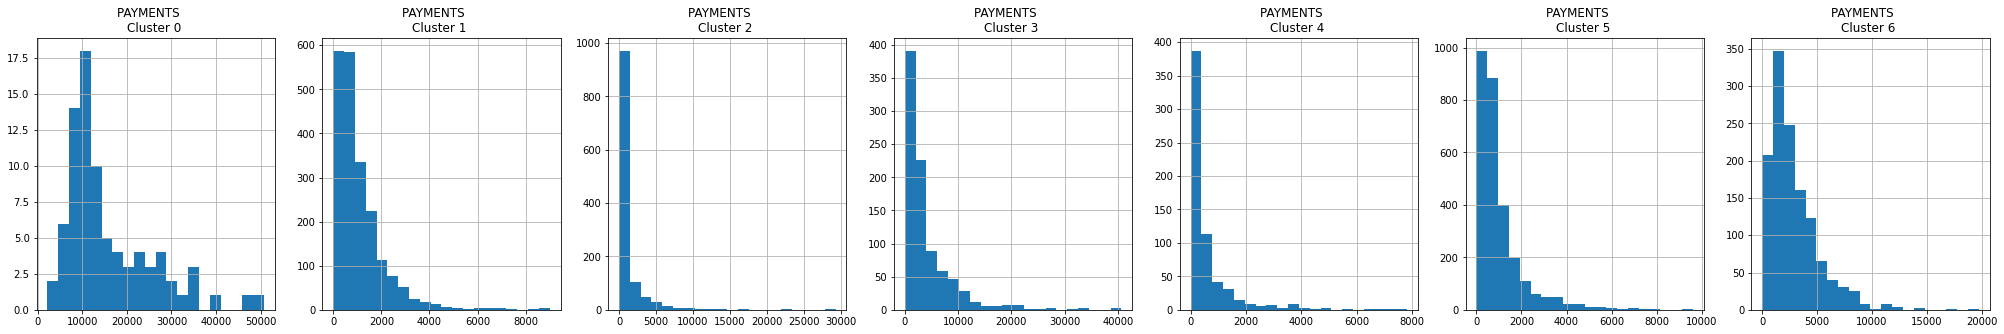

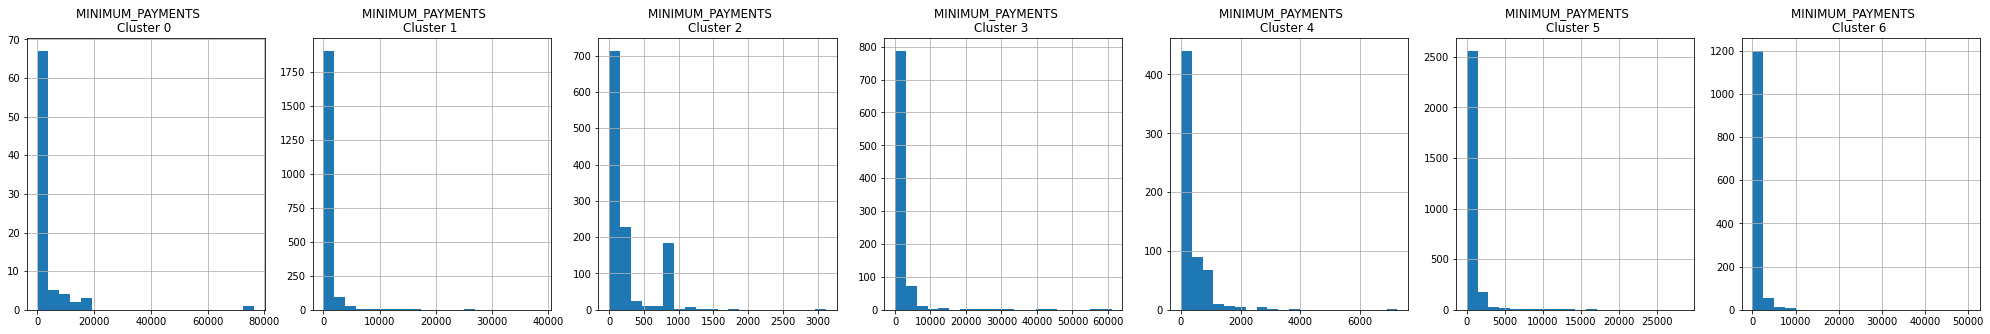

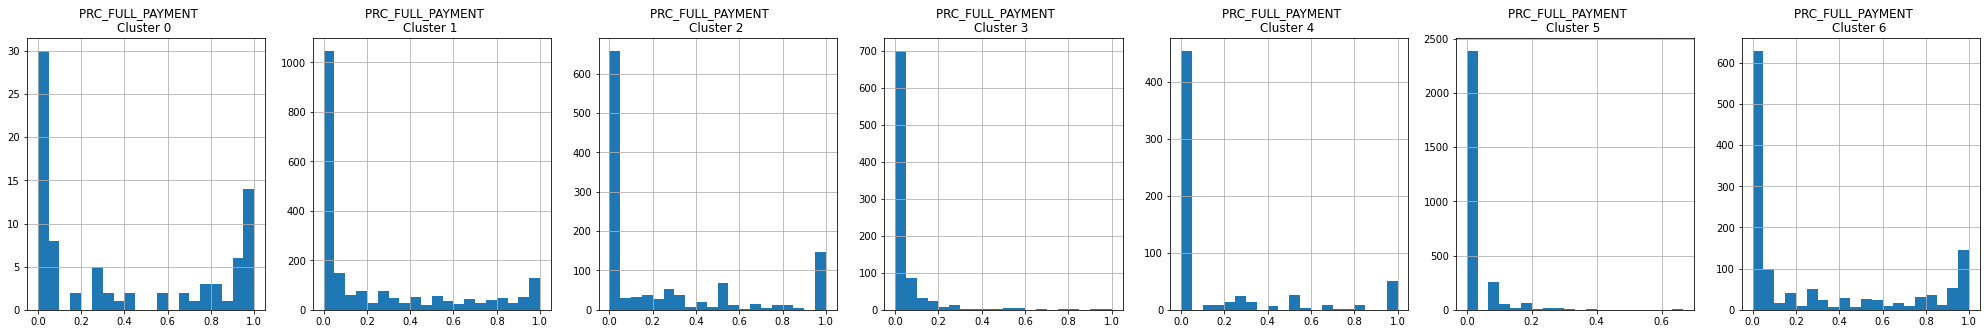

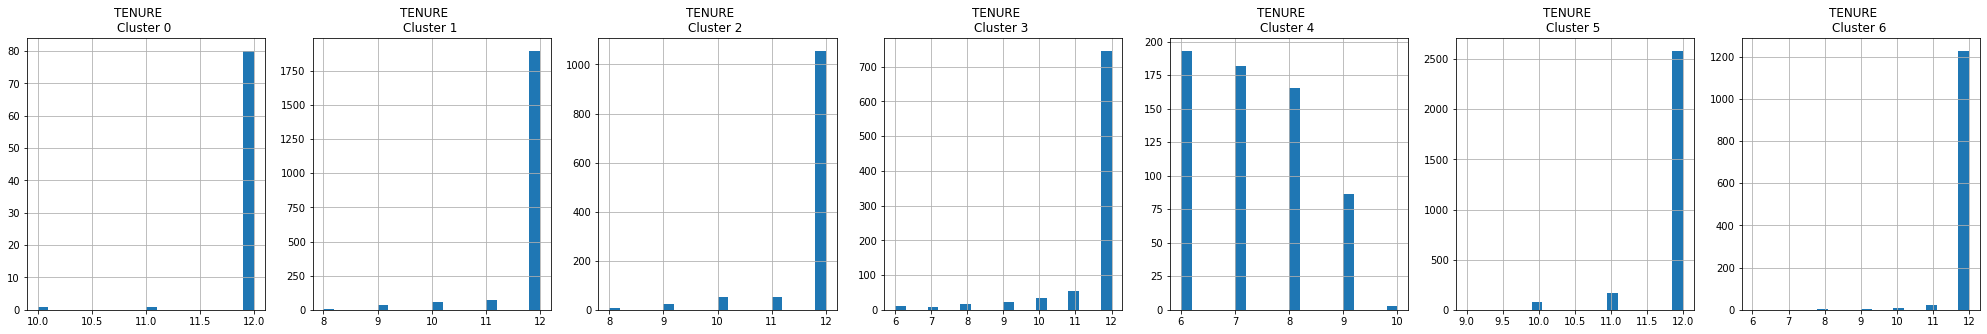

In [ ]:
# Plot the histogram of various clusters
for i in EDA_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = EDA_df_cluster[EDA_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

Principal component analysis

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
principal_comp =pca.fit_transform(data_scaled)
principal_comp

array([[-1.68222014, -1.07645246],
       [-1.13829444,  2.50646996],
       [ 0.96968292, -0.38351526],
       ...,
       [-0.9262036 , -1.81078528],
       [-2.33655136, -0.65796576],
       [-0.55642246, -0.40046246]])

In [ ]:
pca_data = pd.DataFrame(data=principal_comp, columns=['PCA1', 'PCA2'])
pca_data

,PCA1,PCA2
0,-1.682220,-1.076452
1,-1.138294,2.506470
2,0.969683,-0.383515
3,-0.873627,0.043161
4,-1.599434,-0.688581
...,...,...
8945,-0.359629,-2.016145
8946,-0.564369,-1.639124
8947,-0.926204,-1.810785
8948,-2.336551,-0.657966


In [ ]:
pca_data =pd.concat([pca_data,pd.DataFrame({'cluster':labels})],axis=1)
pca_data

,PCA1,PCA2,cluster
0,-1.682220,-1.076452,5
1,-1.138294,2.506470,3
2,0.969683,-0.383515,6
3,-0.873627,0.043161,5
4,-1.599434,-0.688581,5
...,...,...,...
8945,-0.359629,-2.016145,4
8946,-0.564369,-1.639124,4
8947,-0.926204,-1.810785,4
8948,-2.336551,-0.657966,4


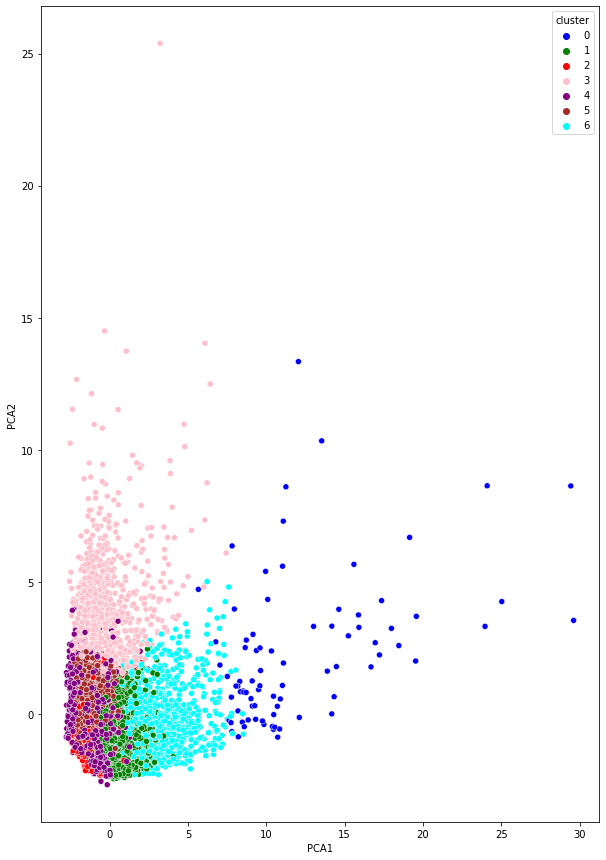

In [ ]:
plt.figure(figsize=(10,15))
ax =sns.scatterplot(x="PCA1", y ="PCA2",hue="cluster",data=pca_data,palette=['blue','green','red','pink','purple','brown','cyan'])
plt.show()

Hierarchical clustering

I using purchase amount and credit limit to see the spending power

In [ ]:
X = EDA_df_cluster.iloc[:, [3,12]].values
X

array([[   0.  , 1000.  ],
       [   0.  , 7000.  ],
       [ 773.17, 7500.  ],
       ...,
       [   0.  , 1000.  ],
       [   0.  ,  500.  ],
       [1093.25, 1200.  ]])

In [ ]:
# visuaizing the data with dendogram

import scipy.cluster.hierarchy as sch

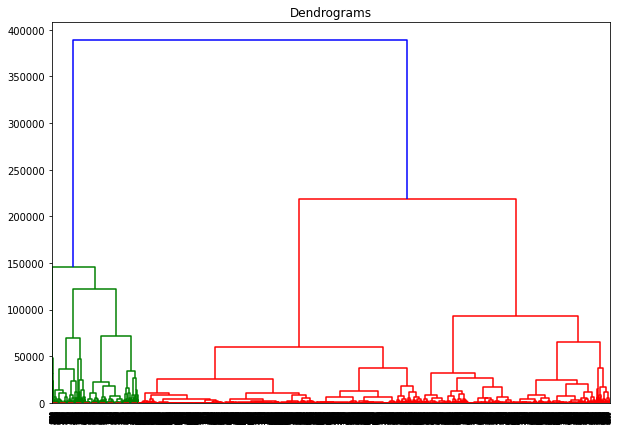

In [ ]:
# make a dendrogram using ward method 
plt.figure(figsize=(10, 7)) 
plt.title("Dendrograms") 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=6, color='r', linestyle='--')


In [ ]:
# applying the hirarchical algorithm to the data

# import the agglomerative/hierarchical cluster from scikit learn 
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# initialize the model
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [ ]:
# fit and predict 
y_hc = hc.fit_predict(X)
y_hc

array([2, 0, 0, ..., 2, 2, 2])

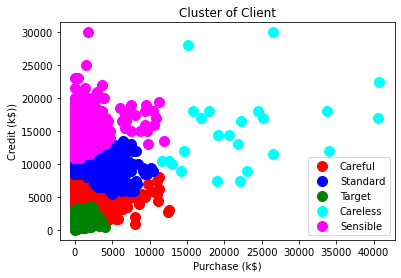

In [ ]:
# Visualizing the  Cluster
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label = 'Sensible')
plt.title('Cluster of Client')
plt.xlabel('Purchase (k$)')
plt.ylabel('Credit (k$))')
plt.legend()
plt.show()

In [ ]:
from pandas import Series, DataFrame
EDA_df_cluster['cluster group'] = Series(y_hc, index=EDA_df_cluster.index)
EDA_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cluster group
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4,2


In [ ]:
# print number of instances in each cluster group
EDA_df_cluster['cluster group'].value_counts()

2    4574
0    2993
1     844
4     515
3      24
Name: cluster group, dtype: int64

majority of the client is still careful spender and second group are spending within their mean